In [19]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
import richardsplot
import pandas as pd
#from densityplot import *

In [20]:
def figsize(hscale, 
            vscale=(np.sqrt(5.0)-1.0)/2.0,
            fig_width_pt = 336.0):
   

    """
    Get the fig_width_pt by inserting \the\textwidth into LaTeX document.

    hscale is fraction of text width you want.

    vscale is fraction of hscale (defaults to golden ratio)  
    """
   
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt*hscale   # width in inches
    fig_height = fig_width*vscale                   # height in inches
    fig_size = [fig_width, fig_height]

    return fig_size

In [21]:
import palettable

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "axes.linewidth":1.5,               # width of box, 2 is too wide, 1 is too narrow
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 16,               # LaTeX default is 10pt font, font size of axis text label
    "axes.labelpad" : 6,                # Distance between label and axis
    "axes.formatter.limits":[-5, 5],    # use sci notation if log10 of axis range is smaller than first or larger than second 
    "axes.formatter.useoffset":False,
    "font.size": 16,
    "legend.fontsize": 12,              # Make the legend/label fonts a little smaller
    "xtick.labelsize": 16,              # Font size of numbers 
    "ytick.labelsize": 16,
    'xtick.major.width':1, 
    'xtick.minor.width':1, 
    'ytick.major.width':1, 
    'ytick.minor.width':1, 
    'xtick.major.size':10,             # size of tickmarks in points
    'xtick.minor.size':5, 
    'ytick.major.size':10, 
    'ytick.minor.size':5,
    'xtick.major.pad':8,               # distance between box and numbers
    'ytick.major.pad':8,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'figure.autolayout': True,
    "figure.figsize": figsize(1,1),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

mpl.rcParams.update(pgf_with_latex)


csdark = palettable.colorbrewer.qualitative.Dark2_5.mpl_colors
cspurple = palettable.colorbrewer.sequential.BuPu_4.mpl_colors
csorange = palettable.colorbrewer.sequential.YlOrBr_5.mpl_colors



In [22]:
#import pandas as pd
#Load the ICA weights from Paul's 6-component fitting (now for DR7)
infile = 'grdr7_180126.weights'
infoHewett = pd.read_csv(infile, sep = ' ', names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"])
infile1 = 'grdr7.radec'
infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])
#print infoHewett
#print infoCoords

In [23]:

infile3 = 'grdr7_Shen2011_targ_uni.csv'
#infile4 = 'gr_info_a_short_coords_Allen2011.csv'

infoShen = pd.read_csv(infile3, skiprows=1, names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation"])
#infoAllen = pd.read_csv(infile4, skiprows=1, names=["file","name","redshift","BALflag","RAx","DECx","SDSS","RAdeg","DEdeg","z","imag","SN","logF1700","logL1700","C4BI","C4d","C4Vmin","C4VMax","Separation"])

#print infoShen['redshift']

In [24]:
#Mask to pick out color-selected objects (ignores radio selected and NaN [non-DR7 objects])
cMask = np.array(infoShen['COLOR_FLAG'])

print len(infoShen[cMask>0])

8403


In [25]:
#Need to format weights for Scikit-Learn
weights = infoHewett[infoHewett.columns[2:]]
#print weights
X = np.array(weights)
print(len(X))
print(X)

# Array of each of the 6 weights
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]

W0 = X[:,0]+X[:,1]+X[:,2]+X[:,3]

8653
[[ 0.02703  0.02643  0.02223  0.02143  0.00709 -0.00161]
 [ 0.02877  0.03135  0.01303  0.02401  0.00364  0.00325]
 [ 0.01492  0.03845  0.01754  0.03449 -0.00269  0.00657]
 ...
 [ 0.01862  0.0358   0.01708  0.03188 -0.00229  0.00096]
 [ 0.02149  0.03355  0.01949  0.02199 -0.00796 -0.00937]
 [ 0.04328  0.0187   0.0041   0.04733  0.01193 -0.00322]]


(1.4, 2.5)

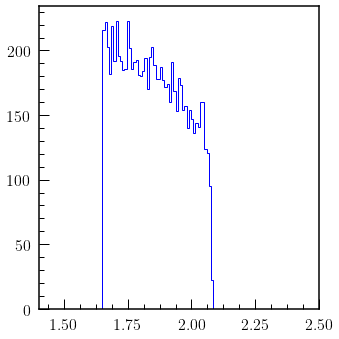

In [26]:
plt.figure(figsize=(5,5))
plt.hist(infoHewett['redshift'], color='b', bins=50, histtype='step')
plt.xlim(1.4,2.5)

In [27]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with z<1.75
zmask = ((zem<=1.75))
print len(infoHewett[zmask]), len(infoHewett)
print len(X[zmask])

2329 8653
2329


Text(0,0.5,'W3')

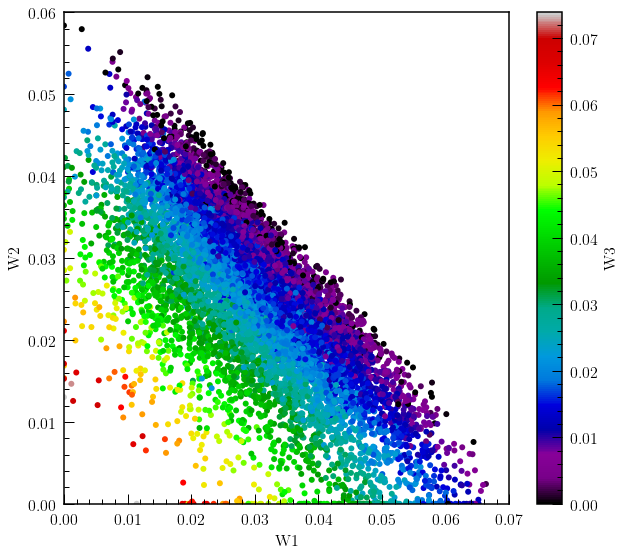

In [28]:
#Distribution of quasars in ICA weight space
plt.figure(figsize=(9,8))

plt.scatter(W1, W2, c=W3, cmap="nipy_spectral", edgecolor="None")
plt.xlabel('W1')
plt.ylabel('W2')
plt.xlim(0,0.07)
plt.ylim(0,0.06)
cbar = plt.colorbar()
cbar.ax.set_ylabel('W3')

In [29]:
#GTR: Did this a different way below.
#np.savetxt("grdr7.tSNE2.csv", projTSNE2, delimiter=",")

In [30]:
# t-SNE
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2)
projTSNE2 = tsne2.fit_transform(X)

In [31]:
print(projTSNE2)

[[  6.798706   21.207592 ]
 [ 31.289967    5.5154624]
 [ 49.77971    54.083607 ]
 ...
 [ 41.80883    39.41598  ]
 [  9.819494   40.984135 ]
 [ 51.49116   -45.299934 ]]


In [32]:
#Output tSNE projections to file
#infile1 = 'grdr7.radec'
#infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])

df = pd.DataFrame({'Name':infoCoords['name'],'RA':infoCoords['RA'],'Dec':infoCoords['Dec'], 'Proj1':projTSNE2[:,0], 'Proj2':-1.0*projTSNE2[:,1]})
df.to_csv('grdr7.radec.projTSNE.csv')


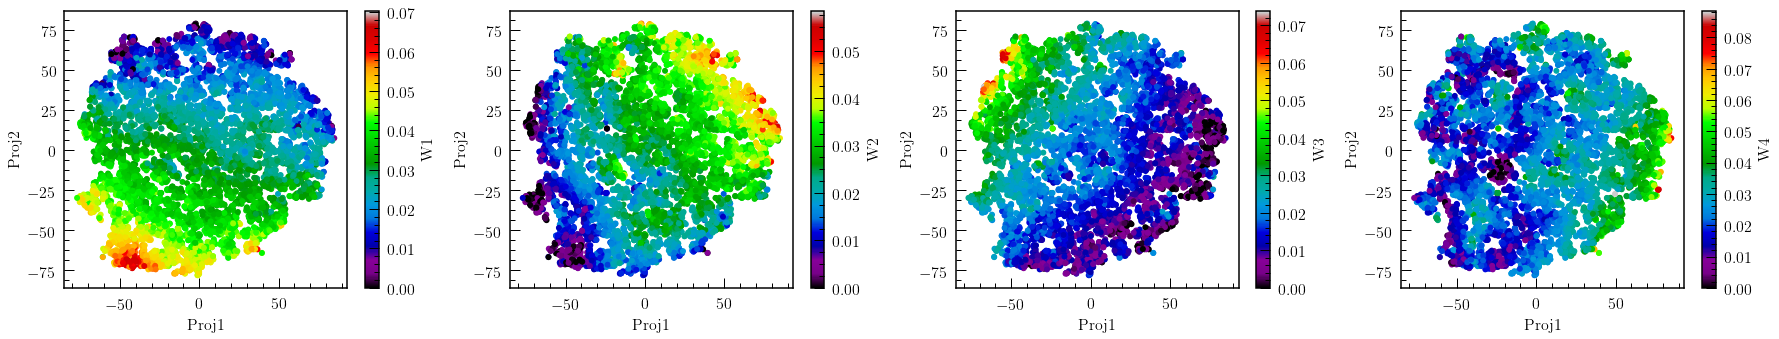

In [33]:
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.subplot(1, 4, 2)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W2, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W2')
plt.subplot(1, 4, 3)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W3, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W3')
plt.subplot(1, 4, 4)
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W4, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W4')
plt.tight_layout()

33.522499847412114 1731
1731 1877 1695 1877 1473


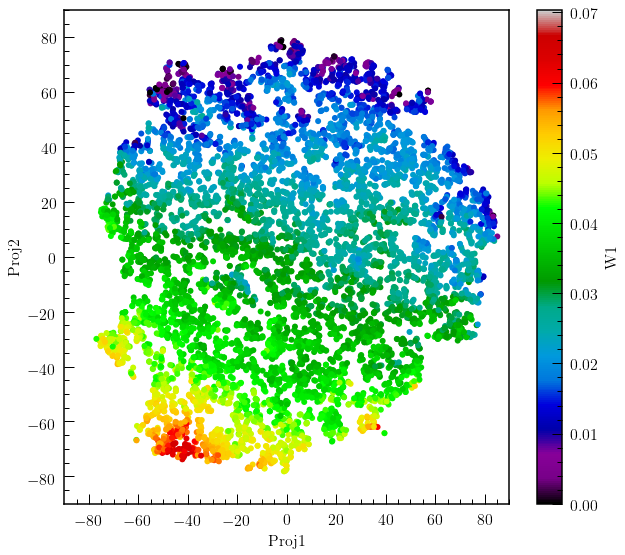

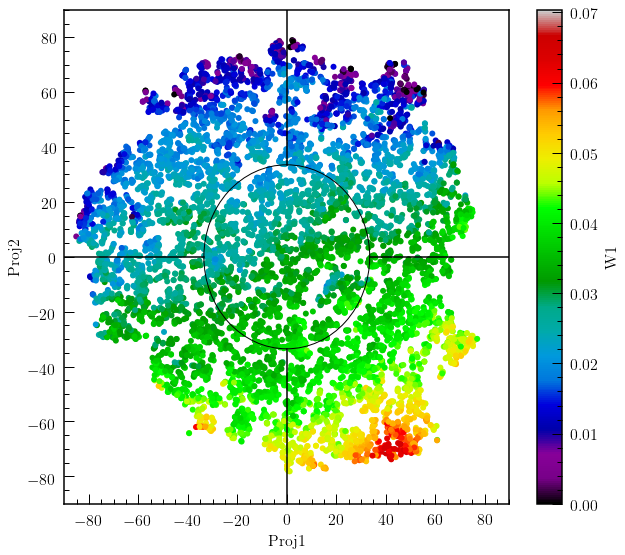

In [35]:
plt.figure(figsize=(9,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.xlim(-90,90)
plt.ylim(-90,90)

plt.figure(figsize=(9,8))
plt.scatter(-1.0*projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None")
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.xlim(-90,90)
plt.ylim(-90,90)


# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
t  = 20 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

mask0 = (r <= r0)
maskI = ((r>r0)&(x>0)&(y>0))
maskII = ((r>r0)&(x<=0)&(y>0))
maskIII = ((r>r0)&(x<=0)&(y<=0))
maskIV = ((r>r0)&(x>0)&(y<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n_0 = mask0.sum()
print r0, n_0

circle=plt.Circle((0, 0), r0, color='k', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k')
plt.plot([0,0], [-r0,-100], c='k')
plt.plot([r0,100], [0,0], c='k')
plt.plot([-r0,-100], [0,0], c='k')

n_I = maskI.sum()
n_II = maskII.sum()
n_III = maskIII.sum()
n_IV = maskIV.sum()
print n_0,n_I, n_II, n_III, n_IV

In [19]:
#Read in radio data
R = np.array(infoShen['R6CM2500A']).astype(float)
FIRST = np.array(infoShen['FINTREST6CM']).astype(float)

In [20]:
#Radio-loud mask
RLmask = (R>10)

/Users/trevormccaffrey/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [21]:
projTSNE2rad = projTSNE2[RLmask]
print len(projTSNE2), len(projTSNE2rad)

8653 8633


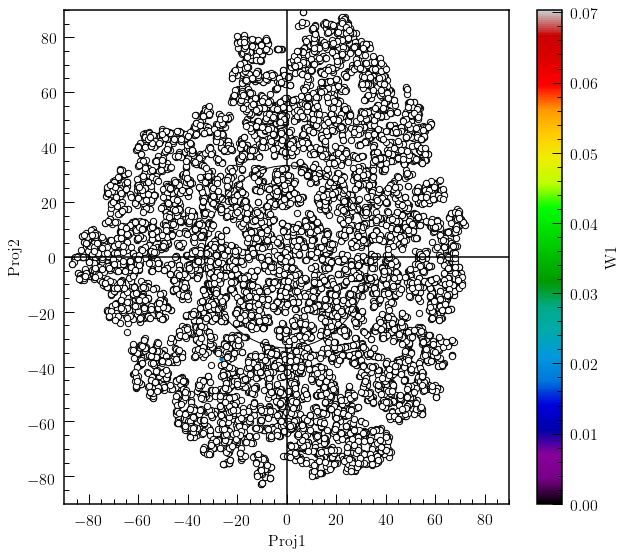

In [22]:
plt.figure(figsize=(9,8))

plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, cmap="nipy_spectral", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2rad[:,0], projTSNE2rad[:,1], c='w', edgecolor='k', s=40)
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)

circle=plt.Circle((0, 0), r0, color='k', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k')
plt.plot([0,0], [-r0,-100], c='k')
plt.plot([r0,100], [0,0], c='k')
plt.plot([-r0,-100], [0,0], c='k')

Compute the RL fractions

In [21]:
# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
xRL  = projTSNE2rad[:,0]
yRL  = projTSNE2rad[:,1]
# Find radial coordinate of each point
rRL  = np.sqrt((xRL - x0)**2 + (yRL - y0)**2)
#t  = 20 # percent
# Find radius that corresponds to t percentile
#r0 = np.percentile(r, t)

mask0RL = (rRL <= r0)
maskIRL = ((rRL>r0)&(xRL>0)&(yRL>0))
maskIIRL = ((rRL>r0)&(xRL<=0)&(yRL>0))
maskIIIRL = ((rRL>r0)&(xRL<=0)&(yRL<=0))
maskIVRL = ((rRL>r0)&(xRL>0)&(yRL<=0))

# Count the number of objects
#n_0 = (r <= r0).sum()
n_0RL = mask0RL.sum()

n_IRL = maskIRL.sum()
n_IIRL = maskIIRL.sum()
n_IIIRL = maskIIIRL.sum()
n_IVRL = maskIVRL.sum()
print n_0RL,n_IRL, n_IIRL, n_IIIRL, n_IVRL
 
    
coreRLF = 100.0*n_0RL/n_0
quadIRLF = 100.0*n_IRL/n_I
quadIIRLF = 100.0*n_IIRL/n_II
quadIIIRLF = 100.0*n_IIIRL/n_III
quadIVRLF = 100.0*n_IVRL/n_IV
print "Core RLF = %.2f percent" % coreRLF
print "Quad I RLF = %.2f percent" % quadIRLF
print "Quad II RLF = %.2f percent" % quadIIRLF
print "Quad III RLF = %.2f percent" % quadIIIRLF
print "Quad IV RLF = %.2f percent" % quadIVRLF

103 38 148 185 45
Core RLF = 5.95 percent
Quad I RLF = 1.96 percent
Quad II RLF = 9.24 percent
Quad III RLF = 10.76 percent
Quad IV RLF = 2.70 percent


Same plot as above, but now with color-selection targeting mask, and limited to $1.55<z<1.65$ (large black circles).

In [22]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with 1.55<z.1.75
#zmask = ((zem>1.65)&(zem<=1.658))
zmask = ((zem>1.645)&(zem<=1.6519))
print len(infoHewett[zmask]), len(infoHewett)
print len(X[zmask])

50 8653
50


Two of these 50 are FIRST sources, 4 are BALs.

In [17]:
plt.figure(figsize=(10,8))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]
print len(projTSNE2colz)

#Arbitrarily flip the signs of the y-axis projection so that the quadrants align with the CIV plot
#plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="nipy_spectral", edgecolor="None", s=20)
plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="PRGn", edgecolor="None", s=20)
#plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="RdYlBu", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], -1.0*projTSNE2radcol[:,1], c='w', edgecolor='k', s=60, label="FIRST")
plt.scatter(projTSNE2colz[:,0], -1.0*projTSNE2colz[:,1], c='k', edgecolor='w', s=500, marker='*', label="Targets")
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)
plt.savefig('newPGtargets.pdf')

/Users/trevormccaffrey/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/trevormccaffrey/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


NameError: name 'RLmask' is not defined

<Figure size 720x576 with 0 Axes>

Now split up the subsamples.

In [24]:
projTSNE2colz0 = projTSNE2[(cMask>0)&(zmask)&mask0]
projTSNE2colzI = projTSNE2[(cMask>0)&(zmask)&maskI]
projTSNE2colzII = projTSNE2[(cMask>0)&(zmask)&maskII]
projTSNE2colzIII = projTSNE2[(cMask>0)&(zmask)&maskIII]
projTSNE2colzIV = projTSNE2[(cMask>0)&(zmask)&maskIV]

print len(projTSNE2colz0), len(projTSNE2colzI), len(projTSNE2colzII), len(projTSNE2colzIII), len(projTSNE2colzIV)


17 10 7 7 9


Write out arrays with these objects

In [25]:
names=["index","name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"]
dftest = pd.DataFrame(infoHewett, columns=names)
dftest.to_csv("test.csv")

In [26]:
print len(weights), len(infoHewett), len(infoShen)

weights0 = weights[(cMask>0)&(zmask)&mask0]
weightsI = weights[(cMask>0)&(zmask)&mask0]
weightsII = weights[(cMask>0)&(zmask)&mask0]
weightsIII = weights[(cMask>0)&(zmask)&mask0]
weightsIV = weights[(cMask>0)&(zmask)&mask0]
#print weights0

info0 = infoHewett[(cMask>0)&(zmask)&mask0]

infoAll = np.hstack( (np.array(infoHewett), np.array(infoShen)) )
print infoAll

#names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"])
#names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation"])
names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "name2","RAx","DECx","SDSSNAME","RA","DEC","redshiftShen","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation"]

infoAll0 = infoAll[(cMask>0)&(zmask)&mask0]
infoAllI = infoAll[(cMask>0)&(zmask)&maskI]
infoAllII = infoAll[(cMask>0)&(zmask)&maskII]
infoAllIII = infoAll[(cMask>0)&(zmask)&maskIII]
infoAllIV = infoAll[(cMask>0)&(zmask)&maskIV]

df = pd.DataFrame(infoAll[(cMask>0)&(zmask)], columns=names)
df0 = pd.DataFrame(infoAll0, columns=names)
dfI = pd.DataFrame(infoAllI, columns=names)
dfII = pd.DataFrame(infoAllII, columns=names)
dfIII = pd.DataFrame(infoAllIII, columns=names)
dfIV = pd.DataFrame(infoAllIV, columns=names)


#Really need to add a header
df.to_csv("newPG_DR7.csv")
df0.to_csv("newPG0_DR7.csv")
dfI.to_csv("newPGI_DR7.csv")
dfII.to_csv("newPGII_DR7.csv")
dfIII.to_csv("newPGIII_DR7.csv")
dfIV.to_csv("newPGIV_DR7.csv")

8653 8653 8653
[['SDSSJ095004.94-002012.2' 1.779394 0.027030000000000002 ...
  46.38268189235073 46.56515229805328 0.00944639610913168]
 ['SDSSJ095938.28-003500.8' 1.8825290000000001 0.02877 ...
  46.137212574050686 46.35351921461925 0.01310219414598886]
 ['SDSSJ101033.44-004724.5' 1.6685029999999998 0.01492 ...
  46.320115013585436 46.390352097342216 0.01267282854534413]
 ...
 ['SDSSJ153912.32+152806.2' 1.717688 0.018619999999999998 ...
  45.722877608490506 45.92864329351044 0.006649763386862894]
 ['SDSSJ151827.93+075100.2' 1.997207 0.021490000000000002 ...
  45.511670906943074 45.68623525194996 0.00962337885303098]
 ['SDSSJ152027.81+074145.6' 1.65575 0.04328 ... 45.38244133393994
  45.61179840091357 0.02320011973261751]]


Replace VLA targets markers with CSC objecdts

In [27]:
infile5 = 'grdr7.radec.projTSNE.CSC.csv'
infoCSC = pd.read_csv(infile5, sep = ',', names=["RA", "Dec", "name", "Proj1", "Proj2", "usrid", "prob"])

In [28]:
#print infoCSC["Proj2"]

50


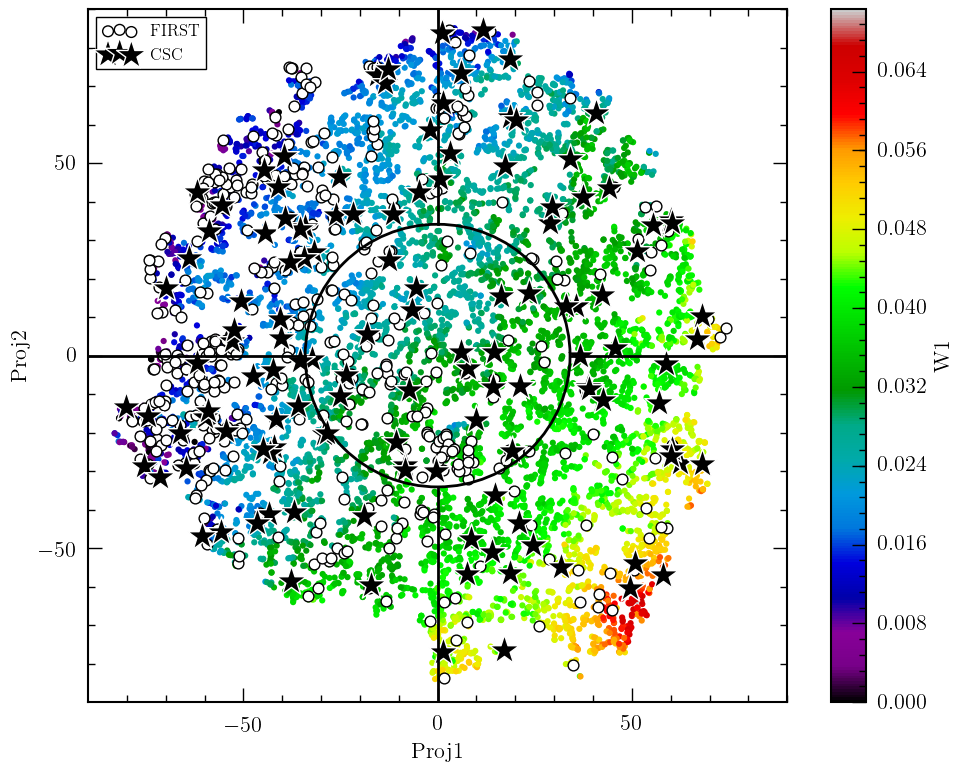

In [29]:
plt.figure(figsize=(10,8))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]
print len(projTSNE2colz)

#Arbitrarily flip the signs of the y-axis projection so that the quadrants align with the CIV plot
plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="nipy_spectral", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], -1.0*projTSNE2radcol[:,1], c='w', edgecolor='k', s=60, label="FIRST")
plt.scatter(infoCSC["Proj1"], infoCSC["Proj2"], c='k', edgecolor='w', s=500, marker='*', label="CSC")
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)
plt.savefig('CSCobjects.pdf')

50


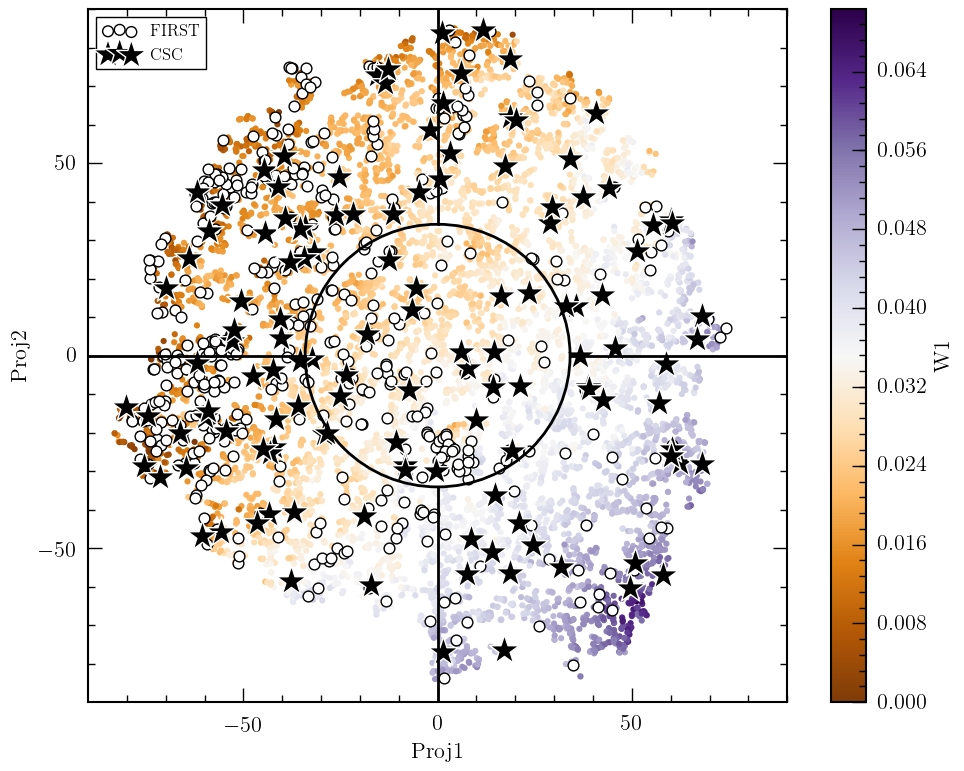

In [33]:
plt.figure(figsize=(10,8))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]
print len(projTSNE2colz)

#Arbitrarily flip the signs of the y-axis projection so that the quadrants align with the CIV plot
#plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="PRGn", edgecolor="None", s=20)
plt.scatter(projTSNE2col[:,0], -1.0*projTSNE2col[:,1], c=W1[cMask>0], cmap="PuOr", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], -1.0*projTSNE2radcol[:,1], c='w', edgecolor='k', s=60, label="FIRST")
plt.scatter(infoCSC["Proj1"], infoCSC["Proj2"], c='k', edgecolor='w', s=500, marker='*', label="CSC")
plt.xlabel("Proj1")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)
plt.savefig('CSCobjects2019.pdf')